In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score,classification_report,confusion_matrix,accuracy_score

# EDA

In [4]:
df=pd.read_csv('Pharma_Industry.csv')
df.shape

(500, 6)

In [5]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [6]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Drug Dosage (mg)'}>,
        <Axes: title={'center': 'Systolic Blood Pressure (mmHg)'}>],
       [<Axes: title={'center': 'Heart Rate (BPM)'}>,
        <Axes: title={'center': 'Liver Toxicity Index (U/L)'}>],
       [<Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Drug Response'}>]], dtype=object)

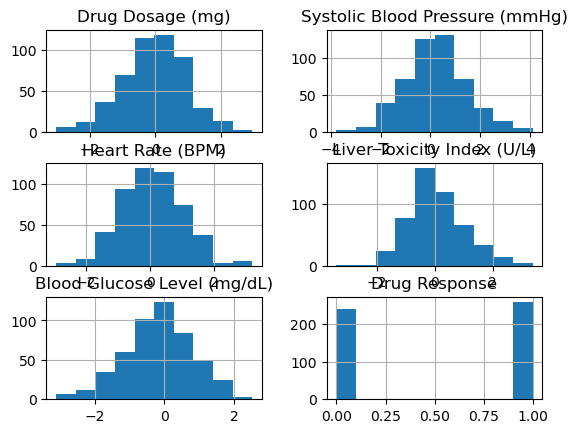

In [8]:
df.hist()

<Axes: >

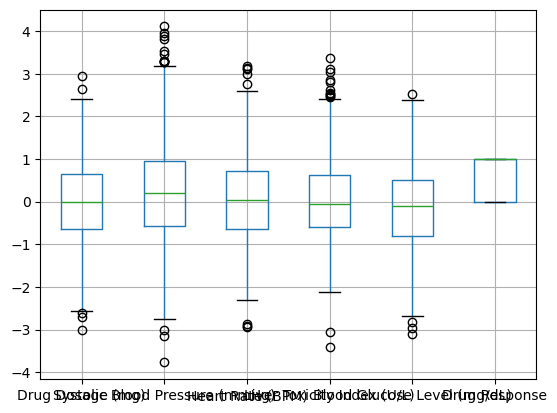

In [9]:
df.boxplot()

<Axes: ylabel='Density'>

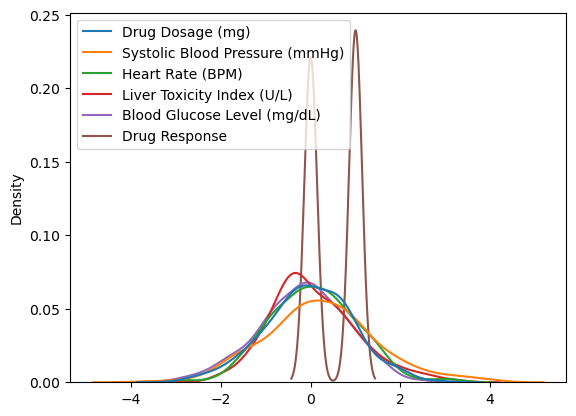

In [15]:
sns.kdeplot(df)

In [16]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(IQR*1.5)
    upper_extreme=Q3+(IQR*1.5)
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df:
    outlier_capping(df,col)

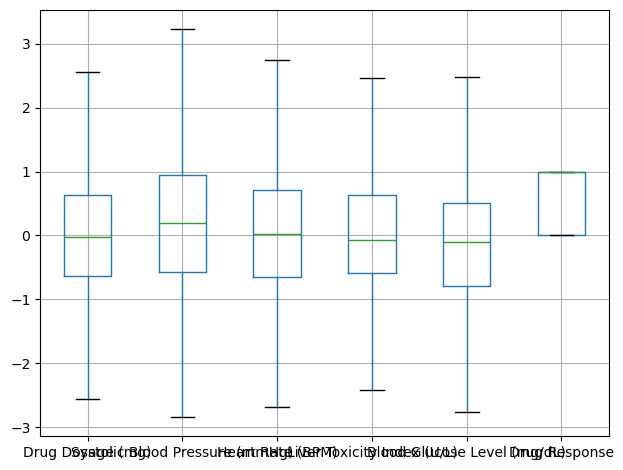

In [19]:
df.boxplot()
plt.tight_layout()
plt.show()

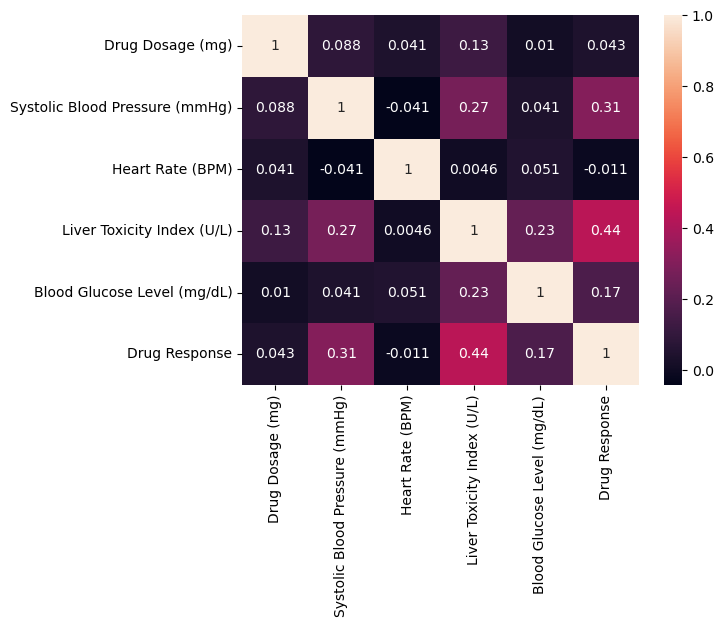

In [21]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Data Preprocessing

All columns are in numerical datatype.So no need to encode

In [24]:
target=df[['Drug Response']]
features=df.drop(columns=['Drug Response'])

features.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.463913,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130


In [25]:
target.head()

,Drug Response
0,1
1,1
2,0
3,1
4,1


In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400, 1)
(100, 1)


# Data Visualization

Text(0.5, 1.0, 'Heart Rate vs Drug Dosage')

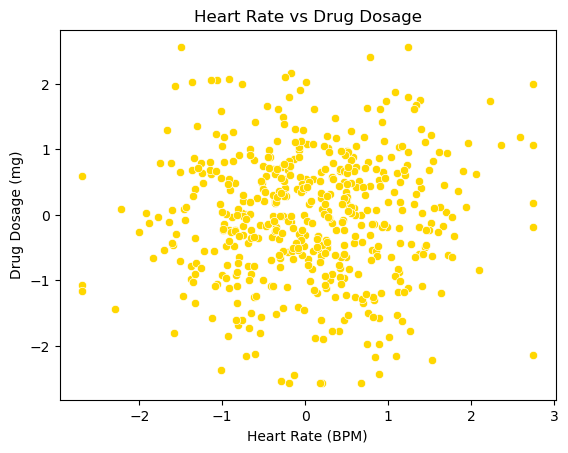

In [38]:
sns.scatterplot(x="Heart Rate (BPM)",y="Drug Dosage (mg)",data=df,color='gold')
plt.title("Heart Rate vs Drug Dosage")

In [46]:
sns.set_theme(style="whitegrid", context="talk", palette="viridis")


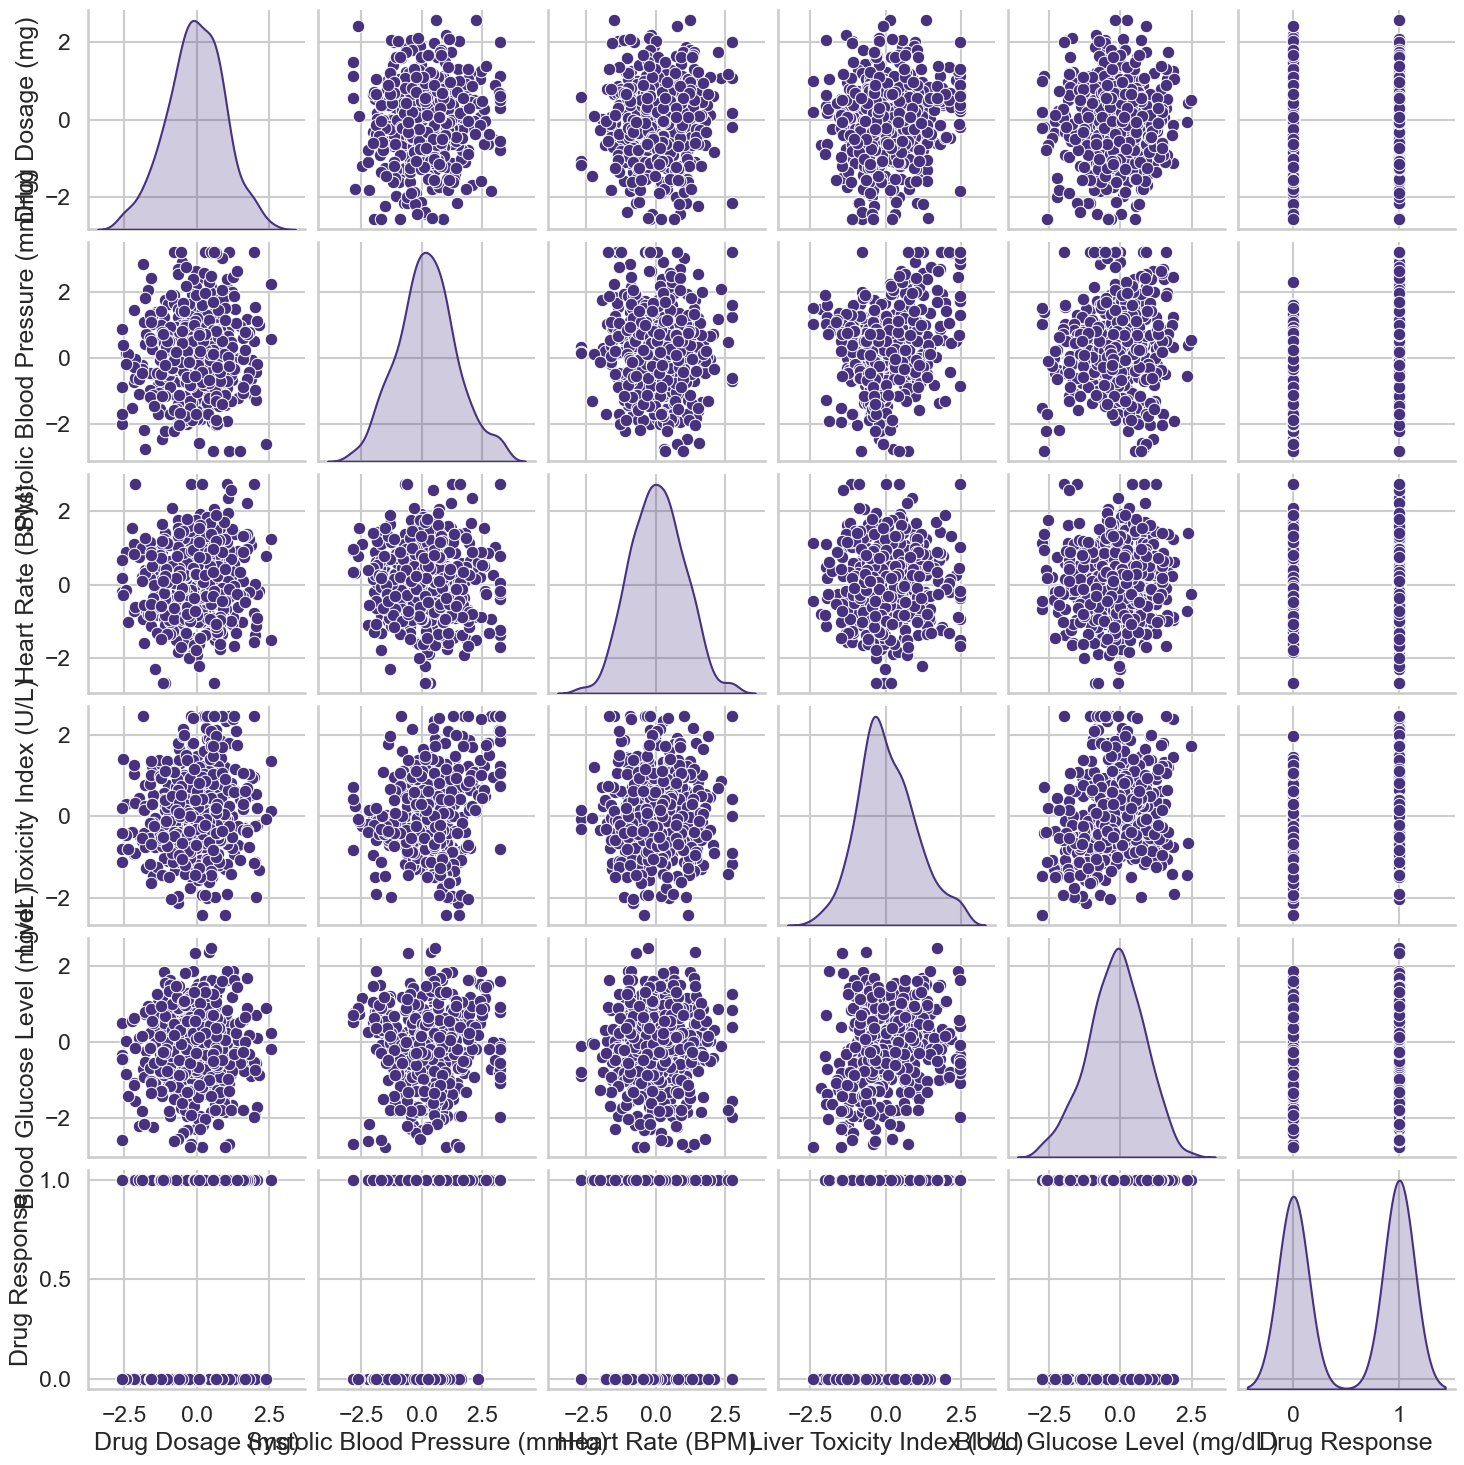

In [48]:
sns.pairplot(df,diag_kind='kde',palette='mako')

<Axes: xlabel='Drug Response', ylabel='count'>

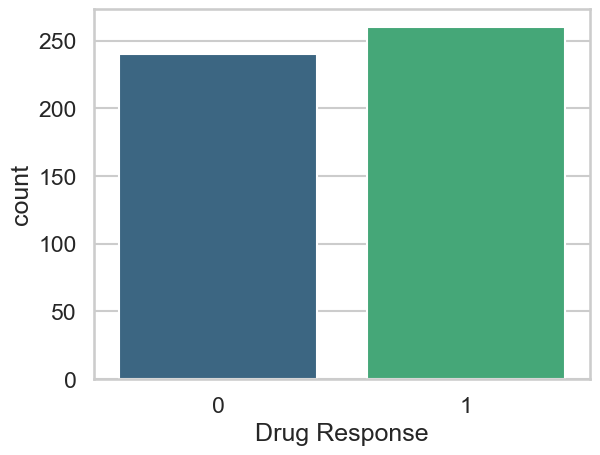

In [51]:
sns.countplot(x="Drug Response", data=df, palette="viridis")

It is balanced

# SVM Implementation

In [56]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [57]:
ypred=svm_model.predict(x_train)
ypred1=svm_model.predict(x_test)

In [60]:
cl=classification_report(y_test,ypred1)
print(cl)

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        37
           1       0.85      0.70      0.77        63

    accuracy                           0.73       100
   macro avg       0.73      0.74      0.72       100
weighted avg       0.76      0.73      0.73       100



# Visualization of SVM Results

<Axes: >

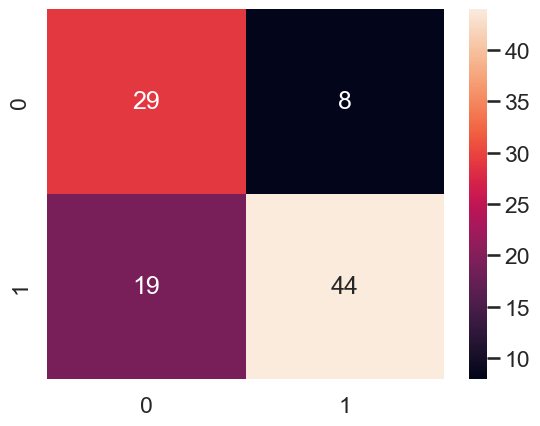

In [65]:
cm=confusion_matrix(y_test,ypred1)
sns.heatmap(cm,annot=True)

# Parameter Tuning and Optimization

In [72]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.1, 1, 10]
Gamma=['rbf', 'poly', 'sigmoid']
best_acc = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        for G in Gamma:
            model = SVC(kernel=kernel, C=C, random_state=42)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Kernel: {kernel}, C: {C},Gamma:{G}  Accuracy: {acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'C': C}

print("\nBest Accuracy:", best_acc)
print("Best Parameters:", best_params)

Kernel: linear, C: 0.1,Gamma:rbf  Accuracy: 0.7100
Kernel: linear, C: 0.1,Gamma:poly  Accuracy: 0.7100
Kernel: linear, C: 0.1,Gamma:sigmoid  Accuracy: 0.7100
Kernel: linear, C: 1,Gamma:rbf  Accuracy: 0.7300
Kernel: linear, C: 1,Gamma:poly  Accuracy: 0.7300
Kernel: linear, C: 1,Gamma:sigmoid  Accuracy: 0.7300
Kernel: linear, C: 10,Gamma:rbf  Accuracy: 0.7300
Kernel: linear, C: 10,Gamma:poly  Accuracy: 0.7300
Kernel: linear, C: 10,Gamma:sigmoid  Accuracy: 0.7300
Kernel: rbf, C: 0.1,Gamma:rbf  Accuracy: 0.7200
Kernel: rbf, C: 0.1,Gamma:poly  Accuracy: 0.7200
Kernel: rbf, C: 0.1,Gamma:sigmoid  Accuracy: 0.7200
Kernel: rbf, C: 1,Gamma:rbf  Accuracy: 0.7300
Kernel: rbf, C: 1,Gamma:poly  Accuracy: 0.7300
Kernel: rbf, C: 1,Gamma:sigmoid  Accuracy: 0.7300
Kernel: rbf, C: 10,Gamma:rbf  Accuracy: 0.7500
Kernel: rbf, C: 10,Gamma:poly  Accuracy: 0.7500
Kernel: rbf, C: 10,Gamma:sigmoid  Accuracy: 0.7500
Kernel: poly, C: 0.1,Gamma:rbf  Accuracy: 0.5800
Kernel: poly, C: 0.1,Gamma:poly  Accuracy: 0.580

# Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

rbf kernel gives the highest accuracy (0.75).
linear kernel is close behind (0.73).
poly kernel underperforms here (0.68–0.69).
sigmoid kernel behaves inconsistently and generally performs worse than rbf and linear.

2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

Based on EDA and Confusion matrix,
Strong Classification of Positive Cases(Class 1),Good True Negative Rate (Class 0) are strengths of SVM.
Lower Recall for Positive Cases (Class 1) is weakness of SVM.

3.	Discuss practical implications of SVM in real-world classification tasks.

Bioinformatics,Image Classification/Recognition,Medical Diagnosis